In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [48]:
# Load the dataset
Weather_data = pd.read_csv('weatherHistory.csv')

In [49]:
# Initial inspection
print(Weather_data.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [50]:
print(Weather_data.describe())

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


Data Cleaning

In [51]:
# Data Cleaning
# Convert 'Formatted Date' to datetime
Weather_data['Formatted Date'] = pd.to_datetime(Weather_data['Formatted Date'], utc=True)

In [61]:
# Step 3: Check for missing values in each column
print(Weather_data.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [64]:
# Fill missing values in 'Precip Type' with the most common value
most_common_precip = Weather_data['Precip Type'].mode()[0]
Weather_data['Precip Type'].fillna(most_common_precip, inplace=True)

Could have used
        # Fill missing categorical data with the most common value(mpde)
        if data[column].dtype == 'object':
            most_common = data[column].mode()[0]
            data[column].fillna(most_common, inplace=True)
        else:
            # Fill missing numerical data with the median
            median_value = data[column].median()
            data[column].fillna(median_value, inplace=True)

Could Have Used
#'Precip Type' has missing values, fill them with the mode, most common value
mode_precip = Weather_data['Precip Type'].mode()[0]
Weather_data['Precip Type'].fillna(mode_precip, inplace=True)

In [65]:
# Drop columns not changing
Weather_data = Weather_data.drop('Loud Cover', axis=1)
print(Weather_data.head())

             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                   259.0          15.8263          

In [66]:
# Print updated information to confirm changes
print(Weather_data.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


Detect and handle outliers in numerical columns
# For simplicity, we'll use Z-score for outlier detection in 'Temperature (C)'

In [69]:
from scipy.stats import zscore

In [71]:
# Add a new column with Z-scores of 'Temperature (C)'
Weather_data['Temp_Z'] = zscore(Weather_data['Temperature (C)'])

# Filter out rows where the z-score is greater than 3 or less than -3 (standard outlier threshold)
weather_data = Weather_data[(Weather_data['Temp_Z'] < 3) & (Weather_data['Temp_Z'] > -3)]

In [72]:
print(Weather_data.head())

             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                   259.0          15.8263          

In [79]:
# Drop the temporary Z-score column
Weather_data.drop(columns=['Temp_Z'], inplace=True)

In [77]:
# Repeat similar steps for other numerical columns as needed, Example for 'Wind Speed (km/h)'
Weather_data['Wind_Speed_Z'] = zscore(Weather_data['Wind Speed (km/h)'])
Weather_data = Weather_data[(Weather_data['Wind_Speed_Z'] < 3) & (Weather_data['Wind_Speed_Z'] > -3)]


In [78]:
Weather_data.drop(columns=['Wind_Speed_Z'], inplace=True)

In [80]:
# Repeat similar steps for other numerical columns as needed, Example for 'Wind Speed (km/h)'
Weather_data['App_Temp_Z'] = zscore(Weather_data['Apparent Temperature (C)'])
Weather_data = Weather_data[(Weather_data['App_Temp_Z'] < 3) & (Weather_data['App_Temp_Z'] > -3)]


In [81]:
Weather_data.drop(columns=['App_Temp_Z'], inplace=True)

In [82]:
# Repeat similar steps for other numerical columns as needed, Example for 'Wind Speed (km/h)'
Weather_data['Humidity_Z'] = zscore(Weather_data['Humidity'])
Weather_data = Weather_data[(Weather_data['Humidity_Z'] < 3) & (Weather_data['Humidity_Z'] > -3)]

In [83]:
Weather_data.drop(columns=['Humidity_Z'], inplace=True)

In [84]:
# Repeat similar steps for other numerical columns as needed, Example for 'Wind Speed (km/h)'
Weather_data['WindBearing_Z'] = zscore(Weather_data['Wind Bearing (degrees)'])
Weather_data = Weather_data[(Weather_data['WindBearing_Z'] < 3) & (Weather_data['WindBearing_Z'] > -3)]
Weather_data.drop(columns=['WindBearing_Z'], inplace=True)

In [85]:
# Repeat similar steps for other numerical columns as needed, Example for 'Wind Speed (km/h)'
Weather_data['Visibility_Z'] = zscore(Weather_data['Visibility (km)'])
Weather_data = Weather_data[(Weather_data['Visibility_Z'] < 3) & (Weather_data['Visibility_Z'] > -3)]
Weather_data.drop(columns=['Visibility_Z'], inplace=True)

In [87]:
# Replace zero pressure values with the mean of non-zero pressures
pressure_mean = Weather_data[Weather_data['Pressure (millibars)'] > 0]['Pressure (millibars)'].mean()
Weather_data.loc[Weather_data['Pressure (millibars)'] == 0, 'Pressure (millibars)'] = pressure_mean

In [88]:
print(Weather_data.head())

             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                   259.0          15.8263          

In [90]:
# Save the cleaned data
cleaned_file_path = 'cleaned_weather_data.csv'
Weather_data.to_csv(cleaned_file_path, index=False)

In [91]:
print("Data cleaning completed. Cleaned data saved to:", cleaned_file_path)

Data cleaning completed. Cleaned data saved to: cleaned_weather_data.csv


**Correlation and Regression Analysis on cleaned data**

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Load the cleaned data
data = pd.read_csv('cleaned_weather_data.csv')

In [97]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Correlation Analysis

In [99]:
# Exclude non-numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

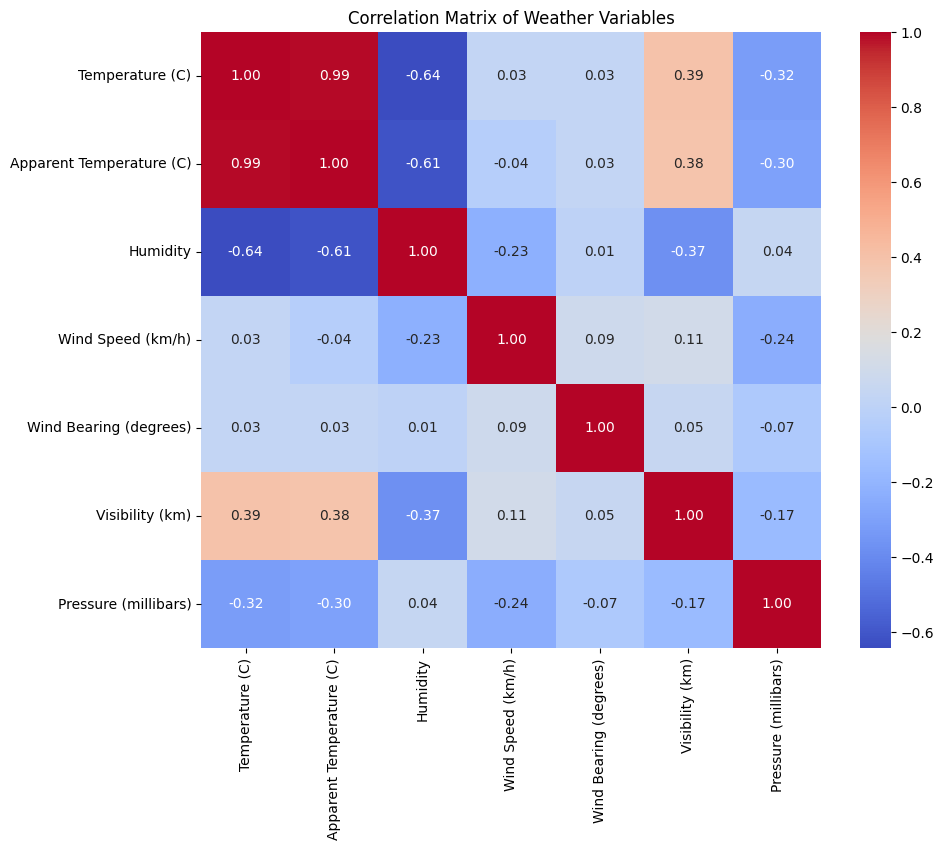

In [100]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables')
plt.show()

#Regression

In [101]:
# Selecting features and target for regression
features = data[['Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
target = data['Temperature (C)']

In [102]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [105]:
#training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [107]:
#predictions
predictions = model.predict(X_test)

In [113]:
print(predictions)

[13.65480228  6.38406556 14.45531611 ...  4.92290446  6.58163996
 19.50028537]


In [114]:
# Create a DataFrame to display actual vs predicted values
comparison_df = pd.DataFrame({'Actual Temperature (C)': y_test, 'Predicted Temperature (C)': predictions})
comparison_df.reset_index(drop=True, inplace=True)

In [115]:
# Display the first few rows of the DataFrame
comparison_df.head()

,Actual Temperature (C),Predicted Temperature (C)
0,4.927778,13.654802
1,8.955556,6.384066
2,17.088889,14.455316
3,16.966667,9.418187
4,6.600000,10.086408


In [109]:
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 40.865641963733175
R^2 Score: 0.5470752425622818


In [118]:
# Example features
features_example = pd.DataFrame({
    'Humidity': [0.75],
    'Wind Speed (km/h)': [10],
    'Pressure (millibars)': [1015]
})

In [120]:
data = pd.DataFrame({
    'Humidity': [0.7, 0.6, 0.9, 0.85],
    'Wind Speed (km/h)': [5, 15, 20, 10],
    'Pressure (millibars)': [1012, 1015, 1013, 1016],
    'Temperature (C)': [22, 20, 24, 21]
})

# Selecting features and target from the dataset
features = data[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
target = data['Temperature (C)']

# Creating and training the regression model
model = LinearRegression()
model.fit(features, target)  # Fitting the model with data

# Now that the model is trained, we can make predictions
# Example features to predict
features_example = pd.DataFrame({
    'Humidity': [0.75],
    'Wind Speed (km/h)': [10],
    'Pressure (millibars)': [1015]
})

# Predicting the temperature
predicted_temperature = model.predict(features_example)
print("Predicted Temperature (C):", predicted_temperature[0])

Predicted Temperature (C): 20.841269841269764


In [116]:
print("The model's R^2 score indicates how well the temperature can be predicted by the model.")
print("This analysis helps in understanding how different weather parameters correlate and influence each other.")

The model's R^2 score indicates how well the temperature can be predicted by the model.
This analysis helps in understanding how different weather parameters correlate and influence each other.
